<div class="alert alert-block alert-info">
<h1> Comparative statics analysis </h1></div>

In [1]:
import pickle as pkl

from dicts_ambiguity_levels import dense_ambiguity_levels
from analysis_comparative_statics import effect_ambiguity_experiences_kw94
from analysis_comparative_statics import plot_effect_ambiguity_choiceshare_kw94
from analysis_comparative_statics import eu_loss_ambiguity
from analysis_comparative_statics import effect_ambiguity_ts_experiences_kw94

%load_ext nb_black

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Get simulated models</b></u></div>

Based on simulated models (each for one ambiguity level) we will perform the comparative static analysis with respect to a change in the ambiguity level.

First, we will load models that were simulated on a dense and a spread ambiguity grid.

In [2]:
simulated_dense_ambiguity_models_kw94 = pkl.load(
    open("sim_dense_ambiguity_models_kw94.pkl", "rb")
)
simulated_spread_ambiguity_models_kw94 = pkl.load(
    open("sim_spread_ambiguity_models_kw94.pkl", "rb")
)

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Effect ambiguity on average experience</b></u></div>

We will investigate how the increase of ambiguity will impact the average experience spent in a blue-collar or white-collar occupation, school, or at home.

The following data frames indicate that an increase of ambiguity (up to $\eta = 0.200$) leads to an increase in schooling, and simultaneously in an increase in white-collar occupation. At the same time, engagement in blue-collar occupations decrease.

Remarkably, the largest relative effects are observed for "small" changes of the ambiguity set. For an ambiguity level above $\eta = 0.100$ an increase in ambiguity does not alter the average experience by much. The reason: For such ambiguity levels the maximum amount of schooling $\bar{h}_t$ is already exhausted.

In [3]:
effect_ambiguity_experiences_kw94(simulated_dense_ambiguity_models_kw94)

,Blue,White,School,Home
0.000,23.122,10.998,12.438,3.442
0.010,15.831,16.791,15.174,2.204
0.020,11.901,19.643,16.819,1.637
0.100,5.451,23.816,19.711,1.022
0.200,4.598,24.432,19.960,1.010
0.500,3.745,25.248,20.000,1.007
1.000,3.163,25.831,20.000,1.006
1.500,2.852,26.143,20.000,1.005


<IPython.core.display.Javascript object>

In [4]:
effect_ambiguity_experiences_kw94(simulated_spread_ambiguity_models_kw94)

,Blue,White,School,Home
0.000,23.122,10.998,12.438,3.442
1.000,3.163,25.831,20.000,1.006
2.000,2.655,26.340,20.000,1.005
3.000,2.451,26.545,20.000,1.004
4.000,2.336,26.662,20.000,1.002
5.000,2.277,26.721,20.000,1.002


<IPython.core.display.Javascript object>

We will complement our predceding analysis by investigating the share of individuals that are in a certain occupation for a given period $t$. To do so, we will select a subset of ambiguity levels that are promising to investigate, `al_selected_dense`. 

The function `plot_effect_ambiguity_choiceshare_kw94` takes the dictionary of simulated ambiguity models and the list (`al_selected_dense`) of selected ambiguity levels. A string can be attached to add a identifier to the file name. The plot will be saved as `.pdf` in the current directory.

**Note:** The selected ambiguity levels have to be a subset of the simulated ambiguity levels, e.g. a subset of `dense_ambiguity_levels`.

In [16]:
print(
    "List of simulated ambiguity levels:",
    list(dense_ambiguity_levels.values()),
    ".",
)

List of simulated ambiguity levels: ['dense', 0.0, 0.01, 0.02, 0.1, 0.2, 0.5, 1.0, 1.5] .


<IPython.core.display.Javascript object>

In [6]:
al_selected_dense = ["0.000", "0.010", "0.020", "0.500"]

<IPython.core.display.Javascript object>

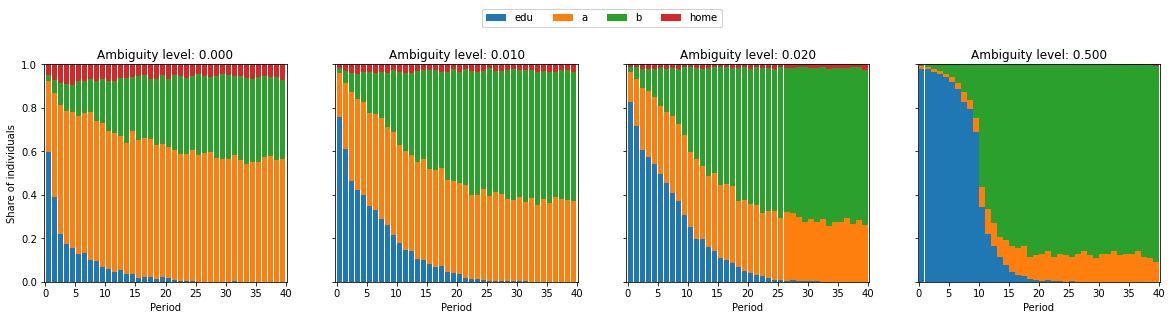

<IPython.core.display.Javascript object>

In [7]:
plot_effect_ambiguity_choiceshare_kw94(
    simulated_dense_ambiguity_models_kw94, al_selected_dense, "dense"
)

<div class="alert alert-block alert-success"> 
<u><b>Effect ambiguity on expected utility</b></u></div>

It is necessary to specify the indexes of the value functions in the respective KW94 or KW97 models.

In [8]:
indexes_value_func_kw94 = [
    "Value_Function_A",
    "Value_Function_B",
    "Value_Function_Edu",
    "Value_Function_Home",
]

<IPython.core.display.Javascript object>

The function **`eu_loss_ambiguity`**
calculates for each simulated ambiguity model the maximum expected utility as average of the individual maximum expected utilities. In particular, for each individual decision-maker $i \in \{1, \dots, N \}$ the maximum value of $v_1^{\pi^*}(s_1)$ will be retrieved. 
The expected utility EU under a model $\mathcal{M}(\theta; \eta)$ is then given by 
$$ \text{EU}_{\eta = a} \equiv \sum_{i=1}^N \frac{1}{N} v_{i1}^{\pi_i^*}(s_{i1}). $$

The expected utility loss is defined as 

$$ \text{EU_loss}_{\eta = a} \equiv \left| \frac{ \text{EU}_{\eta = 0} - \text{EU}_{\eta = a}}{\text{EU}_{\eta = 0}} \right|, $$

where $\text{EU}_{\eta = a}$ denotes the expected utiliy under a model with ambiguity level $\eta = a$, and $\text{EU}_{\eta = 0}$ denotes the expected utility derived in a risk-only model.

In [9]:
eu_loss_ambiguity(
    simulated_dense_ambiguity_models_kw94, indexes_value_func_kw94
)

,EU,EU_loss
0.000,403743.470682,0.000000
0.010,427585.097112,0.059051
0.020,439107.718090,0.087591
0.100,497680.064225,0.232664
0.200,548769.169865,0.359203
0.500,663582.409826,0.643574
1.000,810637.328862,1.007803
1.500,933321.386047,1.311669


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Let ambiguity and tuitions subsidies in!</b></u></div>

We want to add a layer to the analysis above, namely the effect of a tuition subsidy. Together with the information from the ambiguity analysis we can determine the cross-effect of a tuition subsidy for different ambiguity levels.

We will load a simulated ambiguity-tuitionsubsidy KW 94 model and select the tuition subsidies we want to consider. In the example we simulated the model for tuition subsidies $0$ and $1000$. Hence, we will consider the effect of a $\$ 1000$ tuition subsidy in the analysis.

In [10]:
simulated_dense_ambiguity_ts_models_kw94 = pkl.load(
    open("sim_dense_ambiguity_ts_models_kw94.pkl", "rb")
)

<IPython.core.display.Javascript object>

In [11]:
tuition_subsidies = list(
    simulated_dense_ambiguity_ts_models_kw94["0.000"].keys()
)
tuition_subsidies

['0', '1000']

<IPython.core.display.Javascript object>

The effect of a tuition subsidy is largest for low ambiguity-levels.  
In the risk-only world a $ \$1000$ tuition subsidy increase the level of schooling by 1.239 years. In a world with a low level of ambiguity ($\eta = 0.010$) the same tuition subsidy increases schooling by 1.986 years. Hence, a tuition subsidy is 60 \% more effective (as measured in years of completed schooling) in a low-ambiguity world.

However, the picture changes if we increase ambiguity even further. Whereas the tuition subsidy is still 19 \% more effective in a world with $\eta = 0.02$ (compared to $\eta = 0$) it is 40 ppt. less effective compared to a world with $\eta = 0.01$.

Tuition subsidies become ineffective in a world where ambiguity exceeds $\eta = 0.100$. As individuals already have a high level of schooling (as measured to the maximum attainable level of schooling in the model) a tuition subsidy induces only a small effect. The high level of chosen schooling is motived by an insurance motive. 

**Summary:** Economic environments that carry a high level of ambiguity induce a high level of completed schooling (insurance motivation). In those cases, a tuition subsidy is less effective.

In [12]:
effect_ambiguity_ts_experiences_kw94(
    dense_ambiguity_levels,
    tuition_subsidies,
    simulated_dense_ambiguity_ts_models_kw94,
)

Blue   White  School   Home
0.000 0     23.122  10.998  12.438  3.442
      1000  20.086  13.310  13.677  2.927
0.010 0     15.831  16.791  15.174  2.204
      1000  11.479  19.745  17.160  1.616
0.020 0     11.901  19.643  16.819  1.637
      1000   8.791  21.620  18.294  1.295
0.100 0      5.451  23.816  19.711  1.022
      1000   5.224  23.912  19.850  1.014
0.200 0      4.598  24.432  19.960  1.010
      1000   4.548  24.473  19.971  1.008
0.500 0      3.745  25.248  20.000  1.007
      1000   3.736  25.257  20.000  1.007
1.000 0      3.163  25.831  20.000  1.006
      1000   3.160  25.834  20.000  1.006
1.500 0      2.852  26.143  20.000  1.005
      1000   2.852  26.143  20.000  1.005

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-warning"> 
<u><b>Let ambiguity and tuitions subsidies in!</b></u></div>

- `dict_ambiguity_levels`   
dictionary that contains a name (first entry) along with specified ambiguity levels
- `simulated_ambiguity_model`   
pd.DataFrame with the simulated decisions of the agents given by the model $\mathcal{M}(\theta)$
- `dict_simulated_ambiguity_models`   
dictionary that contains a `simulated_ambiguity_model` for each ambiguity level specified in `dict_ambiguity_levels`  
- `df_params`  
pd.DataFrame that contains the desired parametrization of the model $\mathcal{M}(\theta)$
- `dict_options`  
dictionary that contains the options for the simulation of the model